In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
#install kaggle dependency
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d manjilkarki/deepfake-and-real-images

100% 1.68G/1.68G [00:22<00:00, 82.9MB/s]
100% 1.68G/1.68G [00:22<00:00, 81.5MB/s]


In [ ]:
#extract file
import zipfile

with zipfile.ZipFile('deepfake-and-real-images.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

In [1]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import os

In [2]:
print(tf.__version__)

2.14.0


In [ ]:
# Define your data preparation functions
class_mapping = {
    "Fake":0,
    "Real":1
}
def preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img / 255.0
    return img

def load_data(data_dir, amount):
    x_data = []
    y_data = []
    count = 0
    for class_folder in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_folder)
        class_label = class_mapping.get(class_folder, -1)
        for image_file in os.listdir(class_path):
            if image_file.endswith(('.jpg', '.jpeg', '.png')) and count < amount:
                count += 1
                img = preprocess_image(os.path.join(class_path, image_file))
                x_data.append(img)
                y_data.append(class_label)
        count = 0
    return x_data,y_data

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])



In [ ]:
import random
def Rotate(img,min_angle,max_angle):
    angle = random.uniform(min_angle, max_angle)
    # Get the image dimensions
    height, width = image.shape[:2]
    # Calculate the rotation matrix
    center = (width / 2, height / 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    # Perform the rotation
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height), flags=cv2.INTER_LINEAR)
    return rotated_image
def Flip(img):
  if random.randint(0,1):
    return cv2.flip(img,1)
  return cv2.flip(img,0)
def Blur(img,kernel_size=(5,5),sigma_x=0):
  return cv2.GaussianBlur(img, kernel_size, sigma_x)
def add_noise(img,noise_mean=0,noise_std=0.5,noise_factor=0.5):
  img_noise = img + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=img.shape))
  return img_noise

In [ ]:
# Load and split your data
x_train, y_train = load_data("/content/dataset/Dataset/Train", 750)

In [ ]:
for i in range(500,1000):
  x = random.randint(0,4)
  image = x_train[i]
  if x == 0 :
    image = Rotate(image,-30,30)
  elif x == 1 :
    image = Flip(image)
  elif x == 2 :
    image = Blur(image)
  else :
    image = add_noise(image)
  x_train.append(image)
  y_train.append(y_train[i])

In [ ]:
x_test, y_test = load_data("/content/dataset/Dataset/Test", 500)
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = x_train.reshape(x_train.shape[0], 224, 224, 3)
x_test = x_test.reshape(x_test.shape[0],224,224, 3)

In [ ]:
num_samples = len(x_train)
shuffled_indices = np.arange(num_samples)
np.random.shuffle(shuffled_indices)
x_train = np.take(x_train, shuffled_indices, axis=0)
y_train = np.take(y_train, shuffled_indices, axis=0)

In [ ]:
for i in range(100):
  print(y_train[i])

1
1
1
1
0
1
0
1
0
0
0
0
0
0
1
0
1
1
1
1
1
0
0
0
0
0
1
1
1
1
0
1
0
0
1
1
1
0
0
1
0
0
1
1
1
0
0
0
1
1
0
0
1
1
0
0
1
1
1
1
1
1
0
0
1
1
1
0
0
0
1
1
1
1
1
1
1
0
1
1
0
1
1
1
0
1
0
0
1
0
1
1
1
0
0
1
0
1
1
1


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [ ]:
model.save("fromscatch.h5")

In [ ]:
# Prepare labels
y_train_encoded = tf.keras.utils.to_categorical(y_train, 2)
y_val_encoded = tf.keras.utils.to_categorical(y_val, 2)
print(len(y_train_encoded),len(y_val_encoded))

1400 600


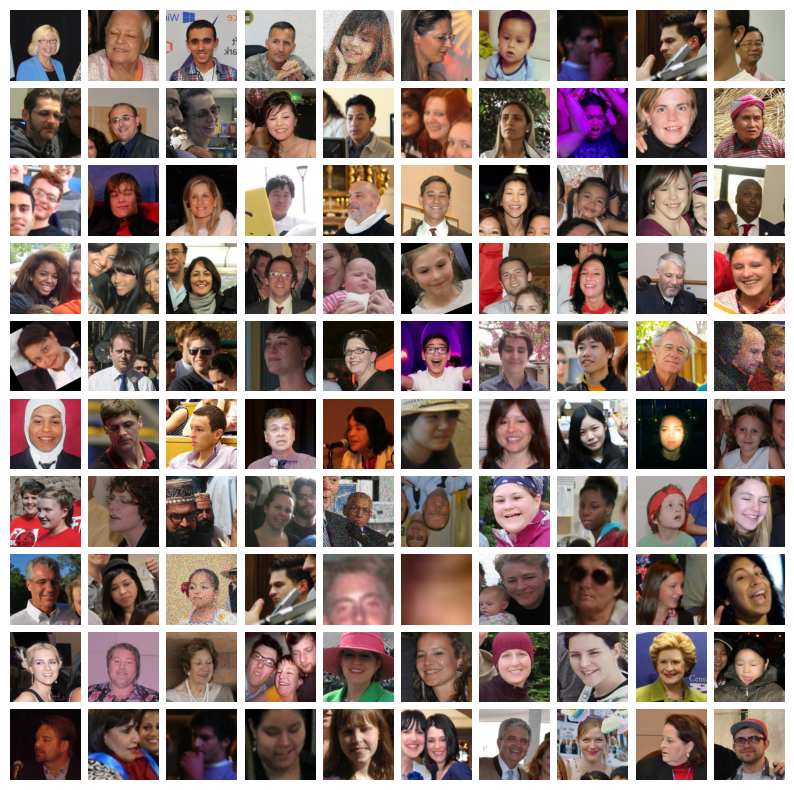

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axes = plt.subplots(10, 10, figsize=(10, 10))

for i, ax in enumerate(axes.ravel()):
        ax.imshow(x_train[i+1300])
        ax.axis('off')

# Adjust spacing and display the plot
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

In [ ]:
history = model.fit(x_train, y_train_encoded, validation_data=(x_val, y_val_encoded), epochs=20, batch_size=32)

# Evaluate the model and create a confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_encoded = tf.keras.utils.to_categorical(y_test, 2)
cm = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_classes)
classes = unique_labels(np.argmax(y_test_encoded, axis=1), y_pred_classes)

# Create a heatmap for the confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()


Epoch 1/20
44/44 [==============================] - 566s 13s/step - loss: 0.9042 - accuracy: 0.5057 - val_loss: 0.6936 - val_accuracy: 0.4633
Epoch 2/20
44/44 [==============================] - 582s 13s/step - loss: 0.6906 - accuracy: 0.5421 - val_loss: 0.6942 - val_accuracy: 0.4633
Epoch 3/20
44/44 [==============================] - 582s 13s/step - loss: 0.6896 - accuracy: 0.5364 - val_loss: 0.6865 - val_accuracy: 0.6283
Epoch 4/20
44/44 [==============================] - 580s 13s/step - loss: 0.6602 - accuracy: 0.6243 - val_loss: 0.6692 - val_accuracy: 0.6517
Epoch 5/20
44/44 [==============================] - 580s 13s/step - loss: 0.6162 - accuracy: 0.6829 - val_loss: 0.6741 - val_accuracy: 0.6250
Epoch 6/20
44/44 [==============================] - 578s 13s/step - loss: 0.5587 - accuracy: 0.7336 - val_loss: 0.6283 - val_accuracy: 0.6617
Epoch 7/20
44/44 [==============================] - 579s 13s/step - loss: 0.4531 - accuracy: 0.7857 - val_loss: 0.5778 - val_accuracy: 0.7150
Epoch 

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report
predictions = model.predict(x_val)
predicted_labels = np.argmax(predictions, axis=1)
multiclass_labels = np.argmax(y_val_encoded, axis=1)

f1 = f1_score(multiclass_labels , predicted_labels, average='weighted')
recall = recall_score(multiclass_labels , predicted_labels, average='weighted')
precision = precision_score(multiclass_labels , predicted_labels, average='weighted')

report = classification_report(multiclass_labels , predicted_labels)
print(report)

print("Weighted F1-score:", f1)
print("Weighted Recall:", recall)
print("Weighted Precision:", precision)

In [ ]:
import matplotlib.pyplot as plt

# Access the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.utils import plot_model

# Replace 'model' with your actual Keras model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
